<a href="https://colab.research.google.com/github/VMKR23/DeepLearning/blob/main/FNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1 50 1.6108803078055636 1.5303836200810685
2 50 1.5150533477380586 1.5079726282554338
3 50 1.50300017755423 1.5043226676651194
4 50 1.497137911792503 1.496902784214744
5 50 1.4933297979806277 1.4998279794862
6 50 1.4913568539914293 1.4959594614898102
7 50 1.4909256737369465 1.49394790583019
8 50 1.4893947740607678 1.4933611954314798
9 50 1.4894539023767401 1.495445252973822
10 50 1.4882086449340461 1.4919763848751406
11 50 1.4869275184582547 1.4986414351040804
12 50 1.487885925815558 1.495917350431032
13 50 1.4879214356957213 1.492931894109219
14 50 1.488670585506252 1.4962733214414572
15 50 1.4889537985645123 1.4940664798398562
16 50 1.4886947191600353 1.4914634499368788
17 50 1.4885217726611888 1.4927065628993361
18 50 1.488206250326974 1.490656320052811
19 50 1.4906068895417235 1.49346318878705
20 50 1.4861676489620574 1.4905513177944134
21 50 1.4863334706088882 1.4907375634471072
22 50 1.4893782898815455 1.4939299414429483
23 50 1.4871011029428511 1.496728773358502
24 50 1.49087442

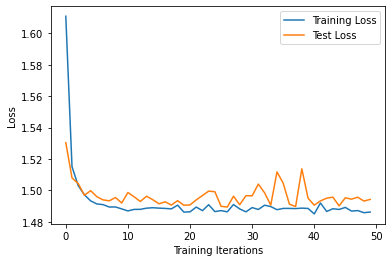

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasetsc
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

class Feed_Forward_Networks(nn.Module):
    def __init__(self):
        super(Feed_Forward_Networks, self).__init__()
        self.Fullyconnectedlayer1 = nn.Linear(784, 256)
        self.RectifiedLinearUnit1 = nn.ReLU()
        self.Fullyconnectedlayer2 = nn.Linear(256, 128)
        self.RectifiedLinearUnit2 = nn.ReLU()
        self.Fullyconnectedlayer3 = nn.Linear(128, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, mp):
        mp = mp.view(-1, 784)
        mp = self.RectifiedLinearUnit1(self.Fullyconnectedlayer1(mp))
        mp = self.RectifiedLinearUnit2(self.Fullyconnectedlayer2(mp))
        mp = self.softmax(self.Fullyconnectedlayer3(mp))
        return mp
train_dataset = datasets.MNIST(root='dataset/', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='dataset/', train=False, transform=transforms.ToTensor(), download=True)
train_ld = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=128, shuffle=True)
test_ld = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=128, shuffle=False)
model = Feed_Forward_Networks()
optim1 = optim.Adam(model.parameters(), lr=0.003)
criterion = nn.CrossEntropyLoss()
n = 50
loss_1es = []
test_losses = []
m=0
while m<n:
    loss_1 = 0.0
    for i, (imgs, lbls) in enumerate(train_ld):
        outputs = model(imgs)
        loss = criterion(outputs, lbls)
        optim1.zero_grad()
        loss.backward()
        optim1.step()
        loss_1 = loss_1+ loss.item()
    loss_1 = loss_1/len(train_ld)
    loss_1es.append(loss_1)
    test_loss = 0.0
    with torch.no_grad():
        for imgs, lbls in test_ld:
            outputs = model(imgs)
            loss = criterion(outputs, lbls)
            test_loss = test_loss+loss.item()
    test_loss = test_loss/len(test_ld)
    test_losses.append(test_loss)
    print(m+1, n, loss_1, test_loss)
    m+=1
plt.plot(loss_1es, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Training Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()
